<a href="https://colab.research.google.com/github/flamorim/BI-Master-2021.1/blob/main/faturamento_RF_flavio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest - Previsão de Séries Temporais

## Importar as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar a base de dados

In [ ]:
dataset = pd.read_csv('fatvarejo.csv', sep=';')
dataset.head()

,MS,ANO,FAT
0,Jan,2003,4899
1,Fev,2003,4734
2,Mar,2003,4759
3,Abr,2003,4874
4,Mai,2003,5721


In [ ]:
dataset["data"] = dataset["MS"] + dataset["ANO"].astype(str)
## tem repetição das colunas mes e ano, assim cria-se a chave primaria
dataset.head()

,MS,ANO,FAT,data
0,Jan,2003,4899,Jan2003
1,Fev,2003,4734,Fev2003
2,Mar,2003,4759,Mar2003
3,Abr,2003,4874,Abr2003
4,Mai,2003,5721,Mai2003


In [ ]:
dataset.index = dataset['data']
dataset = dataset.drop(columns=['ANO', 'MS', 'data'])
dataset.head()

,FAT
data,
Jan2003,4899
Fev2003,4734
Mar2003,4759
Abr2003,4874
Mai2003,5721


In [ ]:
dataset.shape

(132, 1)

## Visualizar série histórica

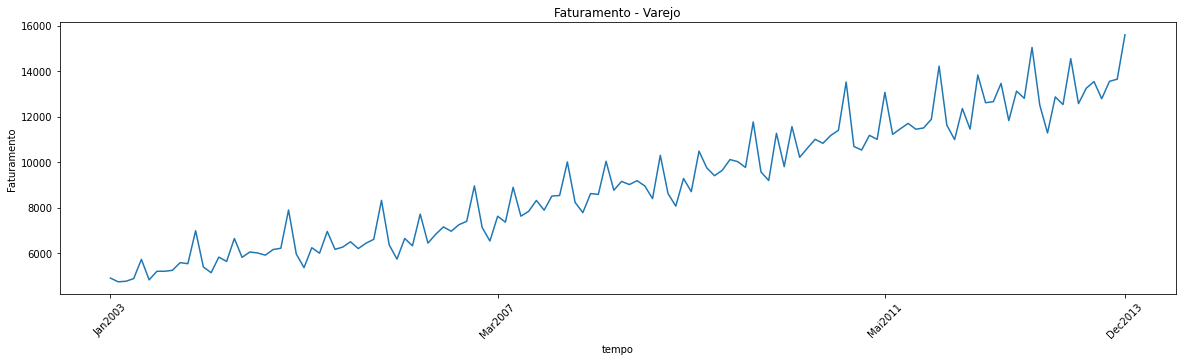

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dataset)
plt.xlabel("tempo")
plt.ylabel("Faturamento")
plt.title("Faturamento - Varejo")
plt.xticks([0,50,100,131], rotation=45) # coloca somente 4 valores no eixo x e rotaciona 45 graus por questões de visualização
plt.show()

## Criar janelamento

In [ ]:
window = 5   ## NUMERO MAGICO
dataSize = len(dataset)
X = []
y = []
for i in range(window, dataSize):
    X.append(dataset.iloc[i-window:i, 0])
    y.append(dataset.iloc[i, 0])
X, y = np.array(X), np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(127, 5)
(127,)


In [ ]:
X[0:6]

array([[4899, 4734, 4759, 4874, 5721],
       [4734, 4759, 4874, 5721, 4820],
       [4759, 4874, 5721, 4820, 5198],
       [4874, 5721, 4820, 5198, 5198],
       [5721, 4820, 5198, 5198, 5239],
       [4820, 5198, 5198, 5239, 5577]])

In [ ]:
y[0:5]

array([4820, 5198, 5198, 5239, 5577])

## Separar em treino e teste

In [ ]:
import random
np.random.seed(0) #semente inicial (reprodução de resultados)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# imprimir
x_train[0:5]

array([[14548, 12570, 13245, 13540, 12785],
       [ 5135,  5821,  5629,  6639,  5811],
       [ 6433,  6602,  8316,  6355,  5734],
       [ 8699, 10482,  9746,  9401,  9637],
       [ 6234,  5992,  6949,  6161,  6263]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(x_train, y_train);

## Utilizar modelo treinado para fazer previsões na base de teste (um passo à frente)

In [ ]:
y_pred = regressor.predict(x_test)
y_pred[0:5]

array([ 6266.9,  8493.2, 13317. ,  5969.1,  7692.9])

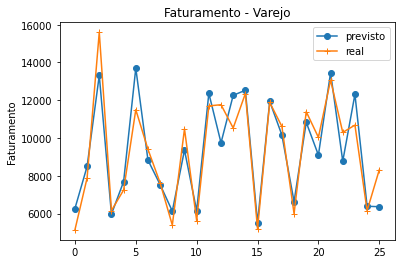

In [ ]:
plt.plot(y_pred, label='previsto', marker='o') # RESULTADO CALCULADO
plt.plot(y_test, label='real', marker='+')     # VALOR REAL
plt.ylabel("Faturamento")
plt.title("Faturamento - Varejo")
plt.legend()
plt.show()

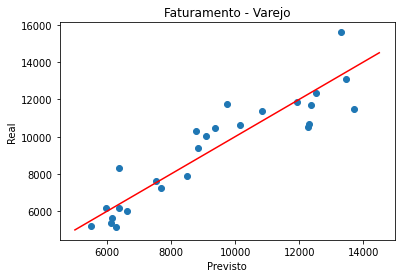

In [ ]:
plt.scatter(y_pred,y_test)
plt.ylabel("Real")
plt.xlabel("Previsto")
plt.title("Faturamento - Varejo")

x = [5000.0, 14500.0]
plt.plot(x, x, color='red'); #reta onde y=x

plt.show()

## Calcular métricas de erro

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_pred,y_test))
print('RMSE: ', rmse)

RMSE:  444.2312338936408


In [ ]:
mse = mean_squared_error(y_pred,y_test)
print('MSE: ',mse)

MSE:  197341.38916666663


In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE: ',mape, '%')

MAPE:  3.844357469968852 %


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9704141797830119

## Prever mais passos à frente

OBS: tenha em conta que o modelo é 'one step ahead'. Ao prever mais passos à frente utilizando a própria previsão, estaremos propagando cada vez mais erro!

### Exercício 1: Utilize o modelo treinado para fazer a previsão de 1 passo à frente

In [ ]:
lag = dataset.iloc[dataSize-window:dataSize,0].values
lag[0:window]

array([12505, 11280, 12865, 12530, 14548, 12570, 13245, 13540, 12785,
       13550, 13645, 15600])

In [ ]:
dataset.tail(window)

,FAT
data,
Jan2013,12505
Fev2013,11280
Mar2013,12865
Abr2013,12530
Mai2013,14548
Jun2013,12570
Jul2013,13245
Ago2013,13540
Set2013,12785


In [ ]:
lag = lag.reshape(1, -1)
print(lag.shape)
lag

(1, 12)


array([[12505, 11280, 12865, 12530, 14548, 12570, 13245, 13540, 12785,
        13550, 13645, 15600]])

In [ ]:
regressor.predict(lag)

array([12750.5])

### Exercício 2: Utilize o modelo treinado para fazer a previsão de 12 passos à frente

In [ ]:
timesteps_to_predict = 12
lag = dataset.iloc[dataSize-window:dataSize,0].values
lag = lag.reshape(1, -1)

predictions=[]
for i in range(timesteps_to_predict):
  prediction = regressor.predict(lag)
  predictions.append(prediction)

  lag = lag[0, 1:window]  
  lag = np.append(lag, prediction[0])
  lag = lag.reshape(1, -1)

In [ ]:
predictions

[array([12750.5]),
 array([11865.5]),
 array([13371.5]),
 array([12806.]),
 array([14556.1]),
 array([12670.]),
 array([13360.5]),
 array([13479.8]),
 array([13377.5]),
 array([13522.4]),
 array([13500.3]),
 array([14326.])]

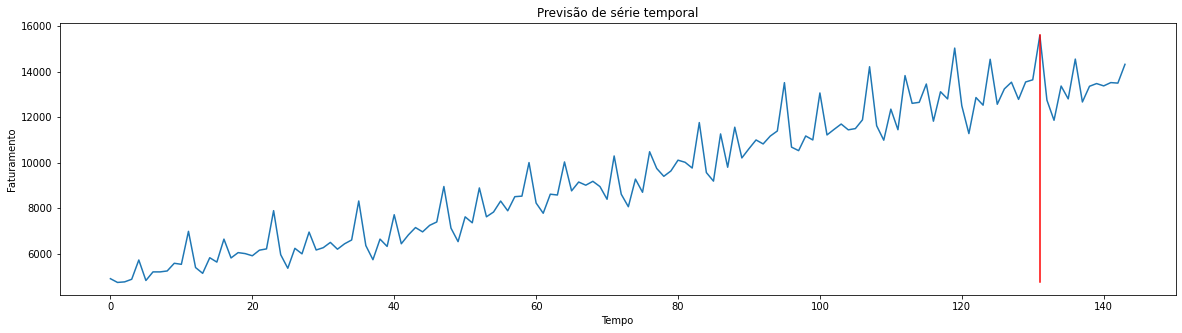

In [ ]:
plt.figure(figsize=(20,5))
all_data = np.vstack((dataset, predictions))
plt.plot(all_data)
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Faturamento')

# marca o início das previsões
x = [len(dataset)-1, len(dataset)-1]
y = [dataset['FAT'].min(), dataset['FAT'].max()]
plt.plot(x, y, color='red')

#salva a figura
plt.savefig('predictions_training_test.svg')
plt.show()